In [2]:
#Imports useful stuff
import random 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
import pandas as pd
from scipy import stats

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [74]:
#Reads in file "playsCleaned.csv".
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
client_0e13c2cd05114f26ab7cc32b4518509d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='gqp82oKkbpxFOo9MxyDOJmZM5hIUY7ky61NW33W7zt9Z',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0e13c2cd05114f26ab7cc32b4518509d.get_object(Bucket='ds320-donotdelete-pr-egg8nb6d95qqxy',Key='playsCleaned.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)


In [75]:
pd.set_option('display.max_columns', 30)
df.head(5)

,timeLeftInSec,down,yardsToFirstdown,yardsToEndzone,isEmpty,isI_Form,isJumbo,isPistol,isShotgun,isSingleback,isWildcat,defendersInTheBox,numberOfPassRushers,numberRB,numberTE,numberWR,defendersInTheBox.1,numberOfPassRushers.1,numberDL,numberLB,numberDB,isTraditional,isRollout,isScramble,yardsGained
0,3600,1,15,80,0,1,0,0,0,0,0,7,4,2,1,2,7,4,4,2,5,1,0,0,10
1,3490,1,10,39,0,0,0,0,0,1,0,7,4,1,1,3,7,4,4,2,5,1,0,0,0
2,3485,2,10,39,0,0,0,0,1,0,0,6,4,2,1,2,6,4,4,2,5,1,0,0,0
3,3481,3,10,39,0,0,0,0,1,0,0,6,5,1,1,3,6,5,4,1,6,0,0,1,33
4,3359,3,1,1,0,0,0,0,1,0,0,8,6,2,3,0,8,6,6,3,2,1,0,0,0


In [ ]:
#Initial hypothesis: We were originally thinking that some combination of the following variables would be useful in predicting the yards gained by the offense on a passing plays. 
#In general, this was based on the assumption that there would be correlation between certain factors, such as offensive/defensive formations, and how well a certain play would do. 
#For instance, we thought that we might find that a certain offensive formation going against a certain defensive set-up would result in a predictable result. With this assumption
#in mind, we selected the following data attributes for our analysis.

#timeLeftInSec: This is how much time is left in the game. We thought that passing plays could become more or less successful at different times of the game

#down: This is the down that the play takes place. Each team has 4 downs to get a first down or the other team gets the ball. We thought that the down would impact how
#aggressive of a play that teams would call, which would impact how many yards they would be likely to gain.

#yardsToFirstdown: this is how many yards the team needs to get a first down. More yards requires teams to be more aggressive, so we thought that more yards to first downs would
#result in more yards gained.

#yardsToEndzone: this is how many yards the team needs to get to the endzone and score a touchdown. More yards requires teams to be more aggressive, so we thought that more yards to 
#endzone would result in more yards gained.

#isEmpty/I_Form/Jumbo/etc: These are the formation that the offensive teams are in. Some formations are designed for different types of plays, so we thought that formation could be used 
#predict yards gained.

#defendersInTheBox/numberOfPassRushers: This is information about how the defense lines up their players. In theory, certain defensive alignments should make it more difficult for the
#offense to gain yards.

#numberRB/TE/WR: This is the number of Running Backs/Tight Ends/Wide Recievers that the offense has on the field for the play. We thought that different combinations of these could be more/less successful.

#numberDL/LB/DB: This is the number of Linemen/Linebackers/Defensive Backs that the defense has on the field for the play. We thought that different combinations of these could be more/less successful.

#isTraditional/Rollout/Scramble: This describes what the quarterback does before throwing the ball. We thought that certain actions could be more or less successful when viewed in coordination 
#with other factors.

In [4]:
#Drops the defendersInTheBox.1 and numberOfPassRushers.1 columns, which appear to be duplicate columns.
df = df.drop(columns=["defendersInTheBox.1","numberOfPassRushers.1"])
df.head()

,timeLeftInSec,down,yardsToFirstdown,yardsToEndzone,isEmpty,isI_Form,isJumbo,isPistol,isShotgun,isSingleback,...,numberRB,numberTE,numberWR,numberDL,numberLB,numberDB,isTraditional,isRollout,isScramble,yardsGained
0,3600,1,15,80,0,1,0,0,0,0,...,2,1,2,4,2,5,1,0,0,10
1,3490,1,10,39,0,0,0,0,0,1,...,1,1,3,4,2,5,1,0,0,0
2,3485,2,10,39,0,0,0,0,1,0,...,2,1,2,4,2,5,1,0,0,0
3,3481,3,10,39,0,0,0,0,1,0,...,1,1,3,4,1,6,0,0,1,33
4,3359,3,1,1,0,0,0,0,1,0,...,2,3,0,6,3,2,1,0,0,0


In [5]:
#Displays the shape of the data frame. It has 17,661 rows and 23 columns
df.shape

(17661, 23)

In [6]:
#Displays information about the data frame. Since the non-null count in each column is the same as the total number of entries,
#it appears that there are no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17661 entries, 0 to 17660
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   timeLeftInSec        17661 non-null  int64
 1   down                 17661 non-null  int64
 2   yardsToFirstdown     17661 non-null  int64
 3   yardsToEndzone       17661 non-null  int64
 4   isEmpty              17661 non-null  int64
 5   isI_Form             17661 non-null  int64
 6   isJumbo              17661 non-null  int64
 7   isPistol             17661 non-null  int64
 8   isShotgun            17661 non-null  int64
 9   isSingleback         17661 non-null  int64
 10  isWildcat            17661 non-null  int64
 11  defendersInTheBox    17661 non-null  int64
 12  numberOfPassRushers  17661 non-null  int64
 13  numberRB             17661 non-null  int64
 14  numberTE             17661 non-null  int64
 15  numberWR             17661 non-null  int64
 16  numberDL             1

In [7]:
#Displays the data types of each of the data frame's columns. All 23 columns are int64 data types.
df.dtypes

timeLeftInSec          int64
down                   int64
yardsToFirstdown       int64
yardsToEndzone         int64
isEmpty                int64
isI_Form               int64
isJumbo                int64
isPistol               int64
isShotgun              int64
isSingleback           int64
isWildcat              int64
defendersInTheBox      int64
numberOfPassRushers    int64
numberRB               int64
numberTE               int64
numberWR               int64
numberDL               int64
numberLB               int64
numberDB               int64
isTraditional          int64
isRollout              int64
isScramble             int64
yardsGained            int64
dtype: object

In [8]:
#Tests for missing values in the data frame with the isnull() and sum() functions. There do not appear to be any missing values!
df.isnull().sum()

timeLeftInSec          0
down                   0
yardsToFirstdown       0
yardsToEndzone         0
isEmpty                0
isI_Form               0
isJumbo                0
isPistol               0
isShotgun              0
isSingleback           0
isWildcat              0
defendersInTheBox      0
numberOfPassRushers    0
numberRB               0
numberTE               0
numberWR               0
numberDL               0
numberLB               0
numberDB               0
isTraditional          0
isRollout              0
isScramble             0
yardsGained            0
dtype: int64

In [9]:
#Tests for duplicate values. There appear to be 3 duplicate values. Since the complete dataset is so large, we decided not to 
#remove these values because we feel that they will not make a material impact on the data analysis. 
print("There are "+str(df.duplicated().sum())+" duplicate values")

There are 3 duplicate values


In [10]:
#Summarizes the data set. Some things that stand out are:
#Shotgun is the most common passing formation at ~67% of passing plays. Wildcat is the least common at just 0.01%.
#On average, the offense has 1.1 running backs, 1.2 tight ends, and 2.8 wide receivers on the field for each passing play.
#Likewise, the defense has an average of 3.3 defenseive linemen, 2.7 linebackers, and 5 defensive backs on the field for every passing play.
#They also have an average of 6 defenders in the box and 4.2 pass rushers for these plays.
#85% of passing plays use a traditional dropback by the quarter back, while 12% use a scramble and just 3% use a designed rollout.
#Lastly, the average passing play gains 6.4 yards. However, with a standard deviation of 10.2, there is quite a large range of
#outcomes for these plays. This makes sense, as incomplete passes result in zero yards gained while pass plays in excess of 
#30 yards are fairly common.

pd.set_option('display.max_columns', 24)
df.describe()

,timeLeftInSec,down,yardsToFirstdown,yardsToEndzone,isEmpty,isI_Form,isJumbo,isPistol,isShotgun,isSingleback,isWildcat,defendersInTheBox,numberOfPassRushers,numberRB,numberTE,numberWR,numberDL,numberLB,numberDB,isTraditional,isRollout,isScramble,yardsGained
count,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000
mean,1701.812242,1.923164,8.947795,52.031935,0.128815,0.047109,0.000849,0.013080,0.669271,0.140592,0.000170,6.014778,4.227167,1.065455,1.179888,2.754657,3.302701,2.652341,5.044561,0.848366,0.033067,0.118566,6.439386
std,1035.927375,0.845437,3.974123,23.504714,0.335004,0.211879,0.029132,0.113619,0.470489,0.347610,0.013033,0.991617,0.837154,0.304955,0.494563,0.559988,0.896191,0.888564,0.647844,0.358675,0.178817,0.323287,10.179283
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-19.000000
25%,807.000000,1.000000,7.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,1.000000,1.000000,3.000000,3.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000
50%,1800.000000,2.000000,10.000000,56.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,4.000000,1.000000,1.000000,3.000000,4.000000,3.000000,5.000000,1.000000,0.000000,0.000000,4.000000
75%,2552.000000,3.000000,10.000000,72.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,5.000000,1.000000,1.000000,3.000000,4.000000,3.000000,5.000000,1.000000,0.000000,0.000000,10.000000
max,3600.000000,4.000000,41.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,9.000000,4.000000,4.000000,5.000000,6.000000,6.000000,8.000000,1.000000,1.000000,1.000000,97.000000


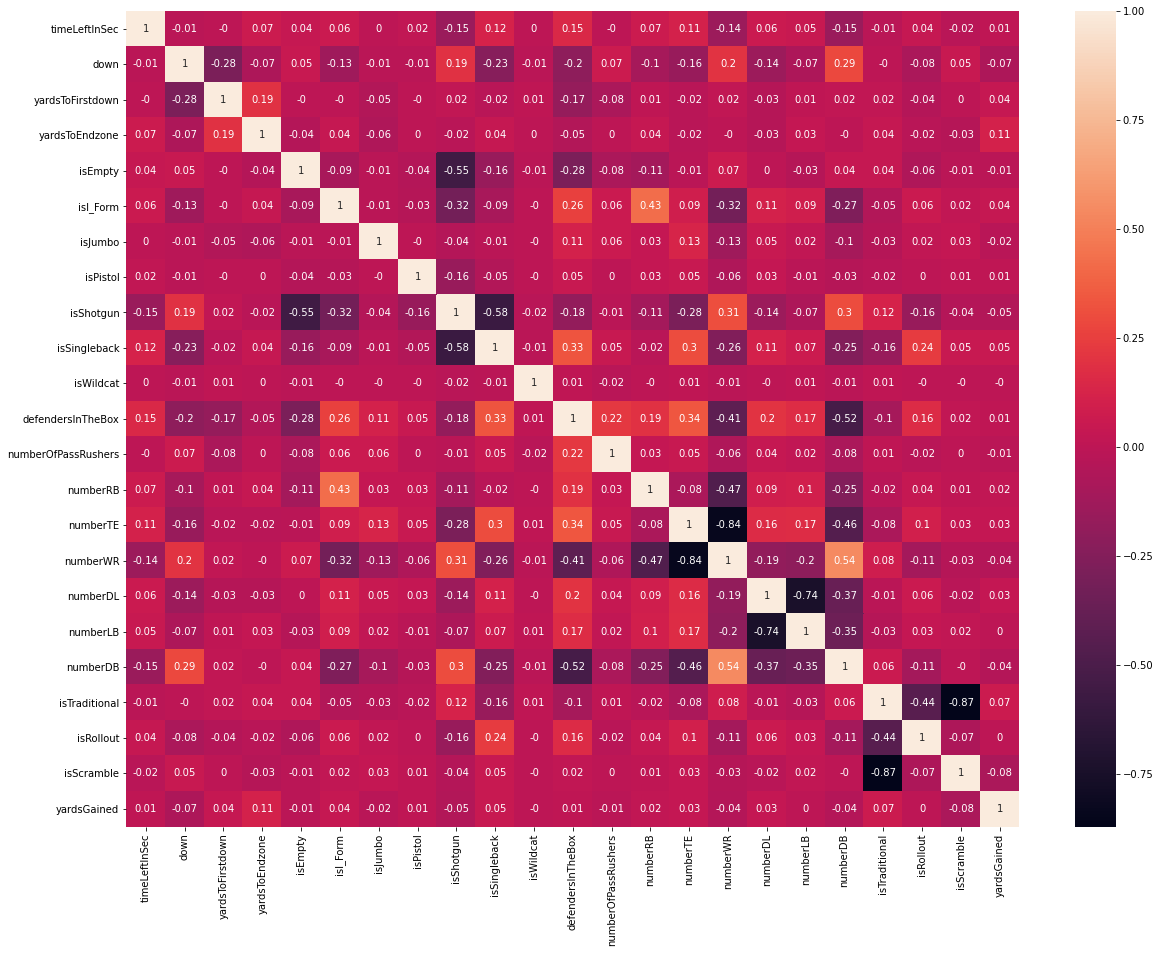

In [11]:
#Displays the correlation matrix for the dataframe. Unfortunately, it seems that there is low correlation with our target variable (yardsGained) and all the other variables
#The best correlation is 0.11 with yardsToEndzone, which is not very good at all. However, we still wanted to try using this data with regression to 
#see how well one of these models would do. 
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix, annot=True)

In [22]:
#Our first attempted model will use every possible column. This is likely to be a pretty bad model, but it is worth a shot.
#Splits yardsGained into separate dataframe called Class
Class = df['yardsGained']
#Creates Predictors variable using remaining columns from the data frame
Predictors = df.loc[:, df.columns != 'yardsGained']

In [23]:
#Applies random data sampling to data frame with (80:20) ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Predictors, Class, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Training set: (14128, 22) (14128,)
Test set: (3533, 22) (3533,)


In [24]:
#Imports packages useful for regression
from sklearn.linear_model import LinearRegression #For linear regression implementation
from sklearn.metrics import mean_squared_error #Its for model evaluation
from sklearn.metrics import r2_score #Its for model evaluation

#Prepares and trains model
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [25]:
#Evaluates the performance of the model for the training set
y_train_predict = lin_model.predict(X_train)
#Calculates the RMSE for the training data
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
#Calculates the R^2 for the training data
r2 = r2_score(Y_train, y_train_predict)

print("Training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#Evaluates the performance of the model for the test set
y_test_predict = lin_model.predict(X_test)
#Calculates the RMSE for the test data
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
#Calculates the R^2 for the test data
r2 = r2_score(Y_test, y_test_predict)

print("Test set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Training set:
RMSE is 10.101009996985537
R2 score is 0.028461009472398713


Test set:
RMSE is 9.838975629026926
R2 score is 0.011905831537355804


In [ ]:
#CONCLUSION: This model was as bad as we expected it to be. This is due to the fact that we included factors that seem like they should 
#be useful predictors but actually have zero correlation with yardsGained. Let's try again with just the most correlated factors.

In [26]:
#Creates Predictors variable using remaining columns from the data frame. These 4 predictors appeared to have the highest correlation
#with yardsGained
Predictors = df[["down","yardsToEndzone","isSingleback","isTraditional"]]

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(Predictors, Class, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Training set: (14128, 4) (14128,)
Test set: (3533, 4) (3533,)


In [28]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [29]:
#Evaluates the performance of the model for the training set
y_train_predict = lin_model.predict(X_train)
#Calculates the RMSE for the training data
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
#Calculates the R^2 for the training data
r2 = r2_score(Y_train, y_train_predict)

print("Training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#Evaluates the performance of the model for the test set
y_test_predict = lin_model.predict(X_test)
#Calculates the RMSE for the test data
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
#Calculates the R^2 for the test data
r2 = r2_score(Y_test, y_test_predict)

print("Test set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Training set:
RMSE is 10.12575742712704
R2 score is 0.023694645308514506


Test set:
RMSE is 9.829300953682019
R2 score is 0.013848064290393092


In [ ]:
#CONCLUSION: This model was not an improvement like we were hoping for. We likely need to take a closer look at the data and
#any outliers before attempting to create more models.

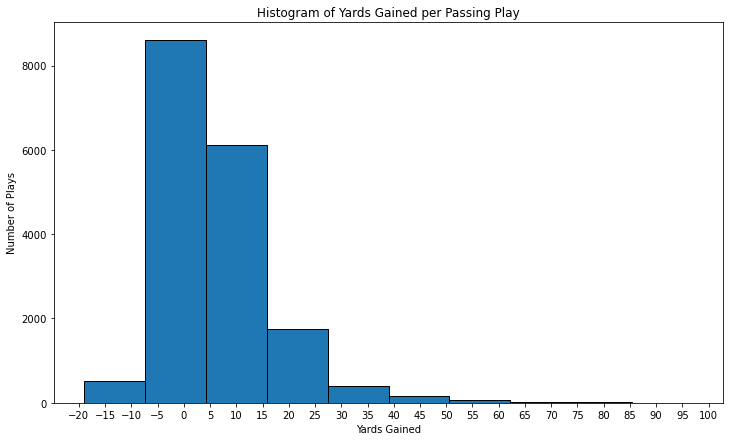

In [30]:
np.histogram(df['yardsGained'],bins=5, range=None, weights=None)
df['yardsGained'].plot(kind='hist', figsize=(12, 7),ec='black')
plt.title('Histogram of Yards Gained per Passing Play') # add a title to the histogram
plt.ylabel('Number of Plays') # add y-label
plt.xlabel('Yards Gained') # add x-label
x_ticks = np.arange(-20, 101, 5)
plt.xticks(x_ticks)

plt.show()
#This graph illustrates the distribution of passing plays. As expected, most plays fall between -7.5 and 15 yards. However, there are a fair number of plays
#That fall outside this range. In addition, there is a clear right skewed distribution of the results.

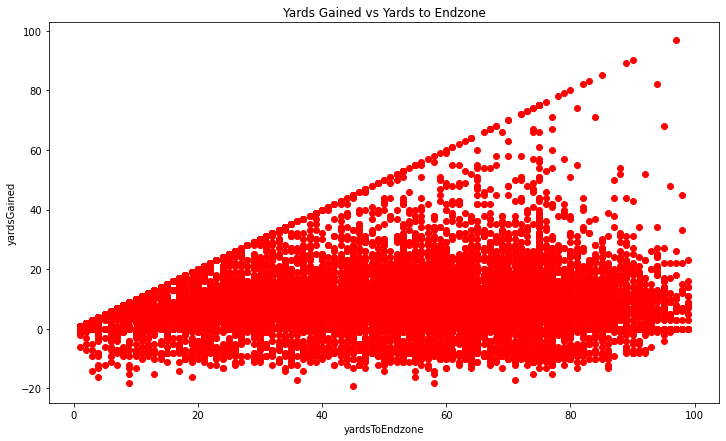

In [31]:
plt.figure(figsize=(12,7))
x_data, y_data = (df["yardsToEndzone"].values, df["yardsGained"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('yardsGained')
plt.xlabel('yardsToEndzone')
plt.title('Yards Gained vs Yards to Endzone')

plt.show()
#This graph illustrates the distribution of yards gained for each yardsToEndzone value. This was supposedly the highest correlated factor for yardsGained, but it seems
#that it can't really tell as much as we may have thought since it seems that the only reason for "correlation" between yards to go and yards gained is that a single
#play can gain more yards when it is farther from the endzone.

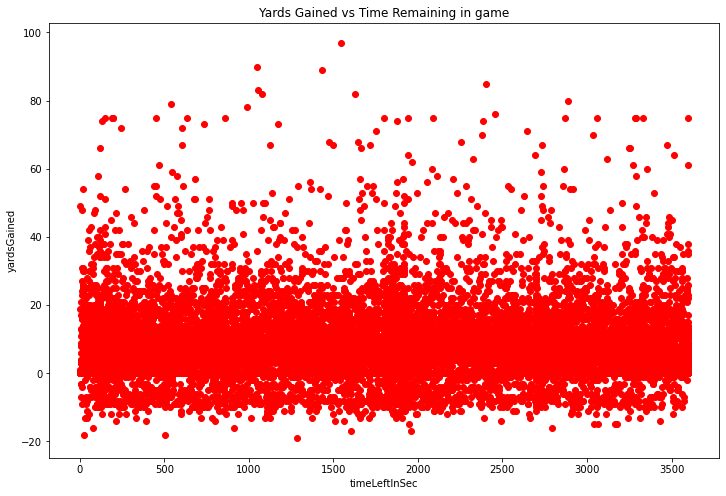

In [32]:
plt.figure(figsize=(12,8))
x_data, y_data = (df["timeLeftInSec"].values, df["yardsGained"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('yardsGained')
plt.xlabel('timeLeftInSec')
plt.title('Yards Gained vs Time Remaining in game')

plt.show()
#Time left in the game seems to have no impact on yardsGained. The data appears completely random.

In [33]:
#Defines new dataframe to just look at rollout plays.
dfRollout = df[df["isRollout"] == 1]
dfRollout = dfRollout.drop(columns=["isTraditional", "isRollout", "isScramble","isWildcat"])
dfRollout.head()

,timeLeftInSec,down,yardsToFirstdown,yardsToEndzone,isEmpty,isI_Form,isJumbo,isPistol,isShotgun,isSingleback,defendersInTheBox,numberOfPassRushers,numberRB,numberTE,numberWR,numberDL,numberLB,numberDB,yardsGained
9,3079,1,10,10,0,0,0,0,0,1,8,3,1,2,2,4,2,5,3
20,2503,2,4,41,0,0,0,0,1,0,7,4,1,1,3,3,3,5,10
47,1361,3,5,41,0,0,0,0,1,0,7,4,1,2,2,3,3,5,15
165,2758,2,2,67,0,0,0,0,1,0,6,4,1,2,2,4,3,4,9
187,1800,1,10,75,0,0,0,0,0,1,7,4,1,3,1,4,3,4,0


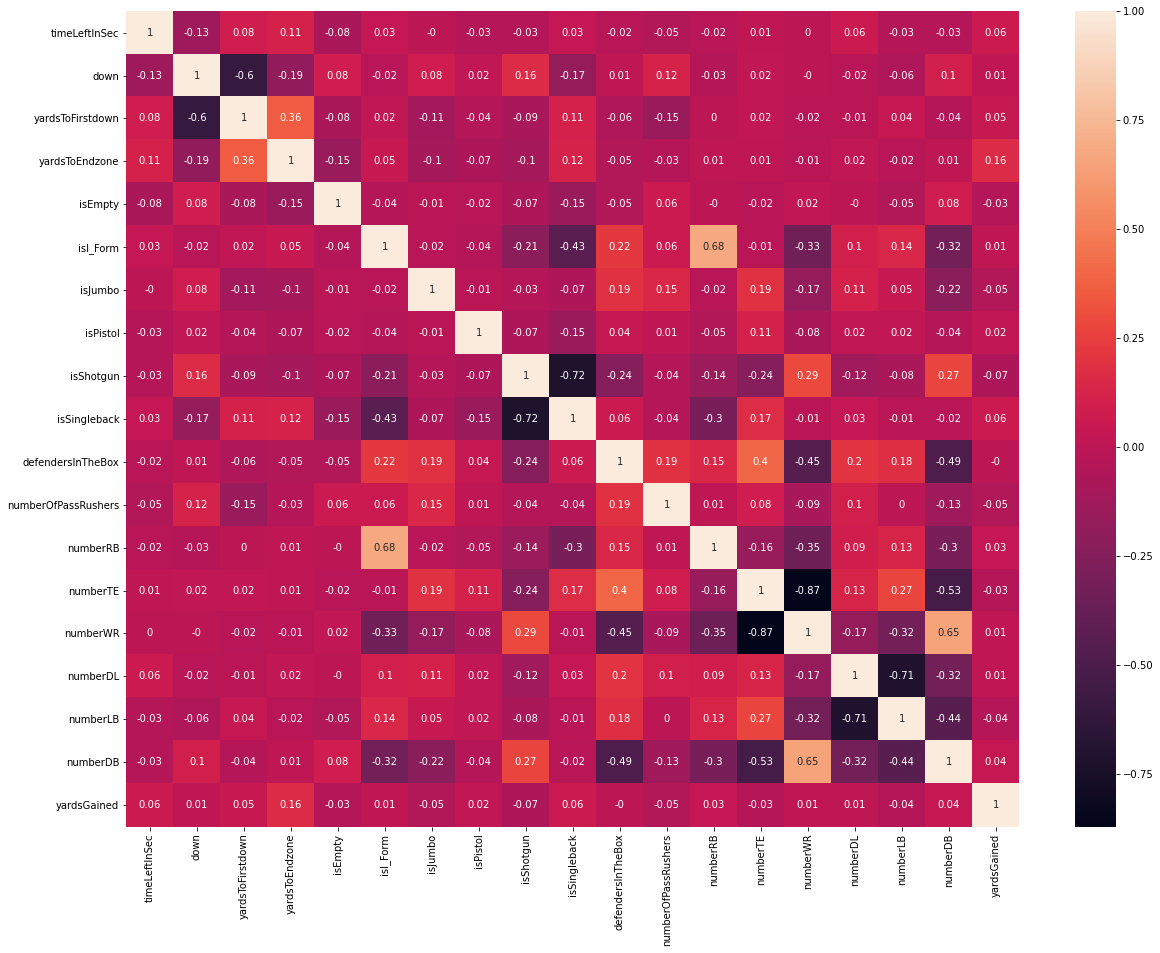

In [34]:
correlation_matrix = dfRollout.corr().round(2)
plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix, annot=True)
#There does not seem to be better correlation in the designed rollout plays than the standard data.

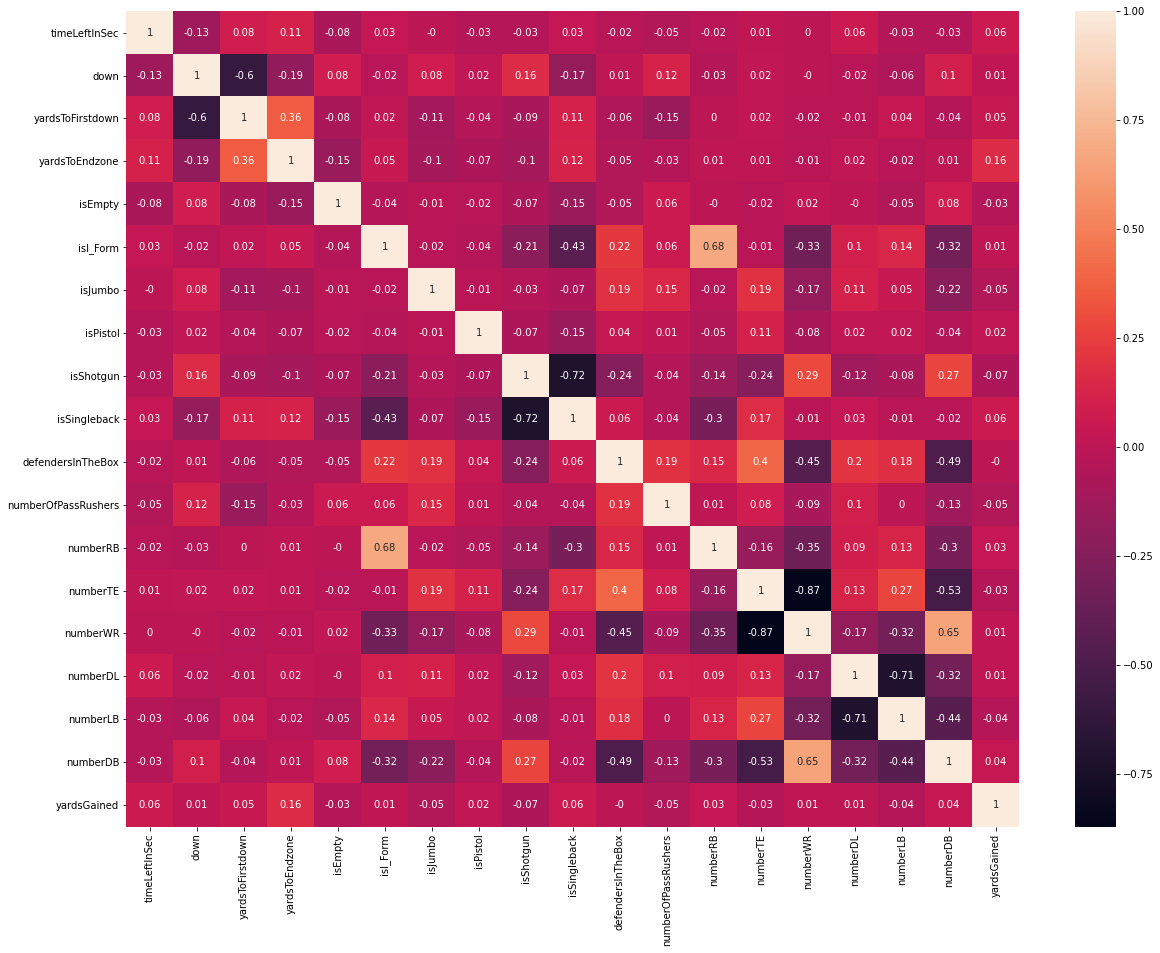

In [35]:
#Defines new dataframe to just look at scramble plays.
dfScramble = df[df["isScramble"] == 1]
dfScramble = dfScramble.drop(columns=["isTraditional", "isRollout", "isScramble","isWildcat"])
correlation_matrix = dfRollout.corr().round(2)
plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix, annot=True)
#There does not seem to be better correlation in the scramble plays than the standard data.

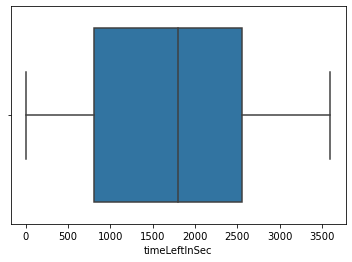

In [36]:
sns.boxplot(x = df["timeLeftInSec"])
#This boxplot showing the timeLeftInSec is pretty uneventful. The data seems fairly evenly distributed and there are no outliers.

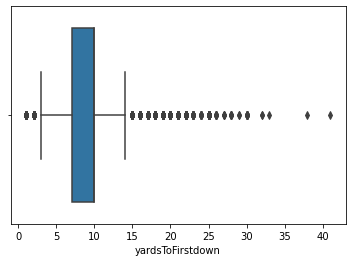

In [37]:
sns.boxplot(x = df["yardsToFirstdown"])
#This boxplot shows the yardsToFirstdown. There is a very narrow inner quartile range, which makes sense because teams start with 10 yards to 
#first down and could only have more than that if they had a huge loss of yards, which isn't very common. Since this is not common, when it does
#happen it appears to get labelled as an outlier.

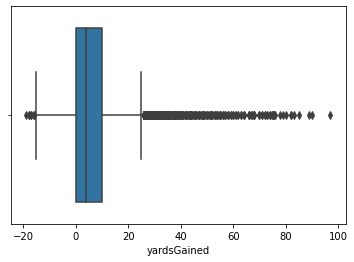

In [38]:
sns.boxplot(x = df["yardsGained"])
#This boxplot shows the yardsGained. The biggest thing that stands out is how many outliers there are. The inner quartile range goes between 0 and 10,
#which makes sense because most passing plays are either incomplete (zero yards gained) or complete for a small gain. However, passing plays that gain
#over 25 yards usually happen a couple of times per game. A 25 yard gain is so much greater in magnitude than the median gain that it is considered an
#outlier even if it isn't that rare. This shows how attempting regression with the yardsGained data could be difficult.

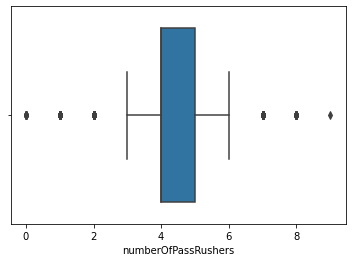

In [39]:
sns.boxplot(x = df["numberOfPassRushers"])
#This boxplot shows the numberOfPassRushers. It appears that teams almost always have between 3 and 6 pass rushers. This means that times when teams have more
#or less rushers than that, it is considered an outlier.

In [40]:
#Creates a dataframe that does not inlcuded any outliers
z = np.abs(stats.zscore(df))
df_o = df[(z < 3).all(axis=1)]
df_o.head(5)

,timeLeftInSec,down,yardsToFirstdown,yardsToEndzone,isEmpty,isI_Form,isJumbo,isPistol,isShotgun,isSingleback,isWildcat,defendersInTheBox,numberOfPassRushers,numberRB,numberTE,numberWR,numberDL,numberLB,numberDB,isTraditional,isRollout,isScramble,yardsGained
1,3490,1,10,39,0,0,0,0,0,1,0,7,4,1,1,3,4,2,5,1,0,0,0
3,3481,3,10,39,0,0,0,0,1,0,0,6,5,1,1,3,4,1,6,0,0,1,33
5,3310,2,8,96,0,0,0,0,1,0,0,7,4,1,1,3,3,3,5,1,0,0,4
6,3264,3,4,92,1,0,0,0,0,0,0,6,4,1,2,2,3,3,5,1,0,0,0
7,3248,1,10,44,0,0,0,0,0,1,0,7,4,1,1,3,4,2,5,0,0,1,0


In [41]:
df.shape

(17661, 23)

In [42]:
#It appears that around 4000 records were removed.
df_o.shape

(13742, 23)

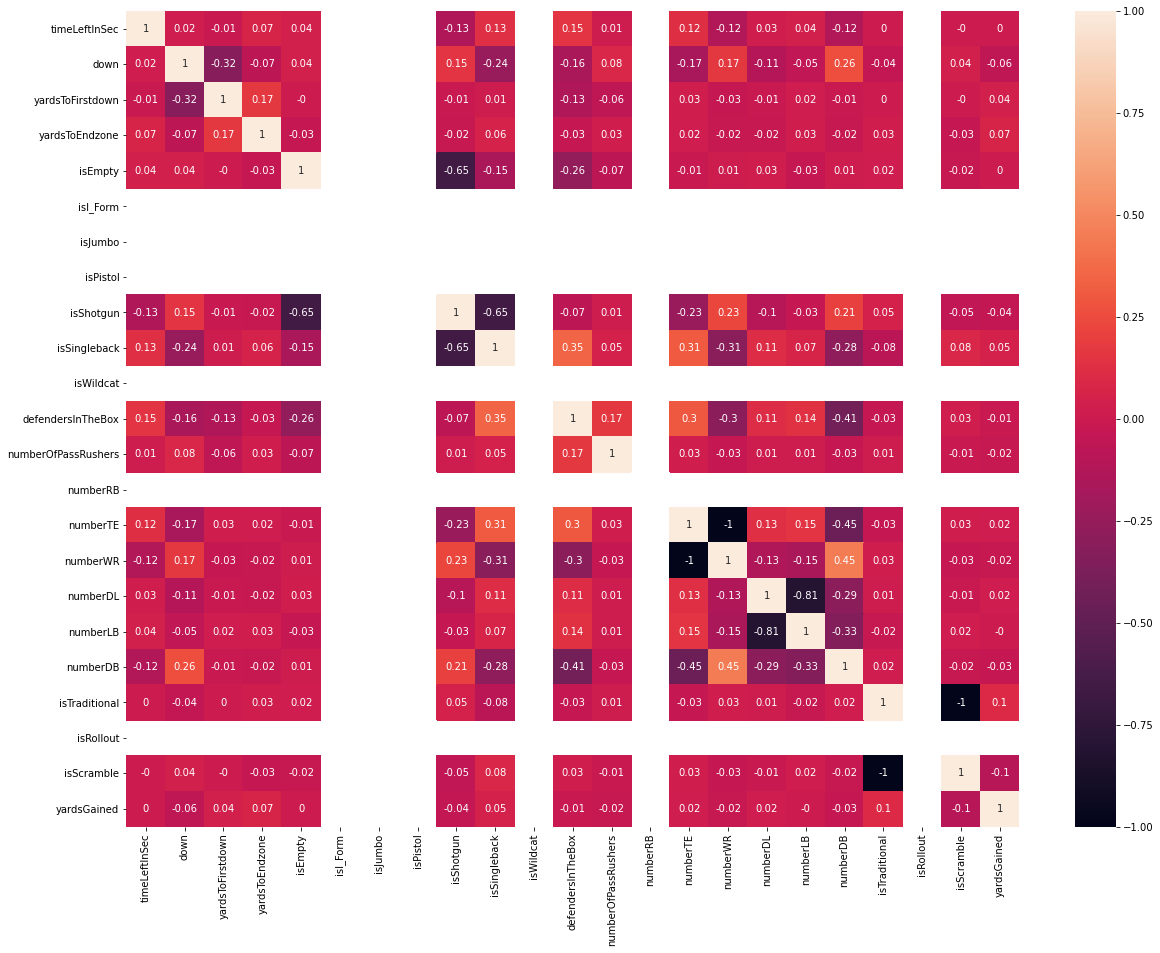

In [43]:
correlation_matrix2 = df_o.corr().round(2)
plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix2, annot=True)
#This correlation is pretty interesting. Apparantly several different formations were considered outliers and completely removed from the data. 
#Rollout plays were also considered outliers. In addition, any plays that did not have exactly 1 RB were removed (This is evident from looking at the data itself)
#However, even with these removals, the yardsGained correlation was not improved. 

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [45]:
msk = np.random.rand(len(df_o)) < 0.8
train_df_o = df_o[msk]
test_df_o = df_o[~msk]


In [46]:
training_x = np.asanyarray(train_df_o[["yardsToEndzone"]])
training_y = np.asanyarray(train_df_o[["yardsGained"]])

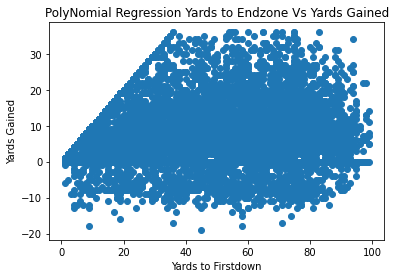

In [83]:
#Here we are building a polynomial regression function for our data using yardsToEndzone and yardsGained, however changing the degree of our data does not help us improve our accuracy. We can see a linear trend on the 
#upper left of the scatter plot, however this is due to the limit on yards gained versus yard to endzone. You cannot gain more yards than there are left to reach the endzone, which is why we have that linear trend on the
#left. Looking at the scatter plot we can also see that the data is very scrambled, with no real pattern to it at all. Changing the degree of our polynomial regression will not help us increase the accuracy. 
poly = PolynomialFeatures(degree = 4)
poly_features = poly.fit_transform(training_x)
poly.fit(training_x,training_y)
poly_regression = LinearRegression()
poly_regression.fit(poly_features,training_y)

#ploting the data  
plt.scatter(training_x,training_y)
plt.plot(training_x,poly_regression.predict(poly_features))
plt.title("PolyNomial Regression Yards to Endzone Vs Yards Gained")
plt.xlabel("Yards to Firstdown")
plt.ylabel("Yards Gained")
plt.show()

In [86]:
from sklearn.metrics import r2_score #Its for model evaluation
y_train_predict = poly_regression.predict(poly_features)
rmse = (np.sqrt(mean_squared_error(training_y, y_train_predict)))
r2 = r2_score(training_y, y_train_predict)

print("R2 score is {}".format(r2))
print("\n")
print("The coefficients of the regression are:" +str(poly_regression.coef_))


# Running the performance test of our polynomial regressino reveals that we have an R2 of just .015, which is extremely low. We know that the R2 test is not the best test for analyzing the accuracy of a polynomial regression. 
# However, based on the scatter plot above it is doubtful that our accuracy will be satisfactory no matter what test we use. We believe that our data is simply not 
# predictable. 

#We attempted to run regressions with more degrees, but it actually made the results less accurate.


R2 score is 0.015466434426152809


The coefficients of the regression are:[[ 0.00000000e+00  5.23906621e-01 -1.44199255e-02  1.63737789e-04
  -6.51594659e-07]]


In [49]:
z = np.abs(stats.zscore(df))
df_noYardOutliers = df[(np.abs(stats.zscore(df["yardsGained"])) < 3)]
df_noYardOutliers.shape
#This should make it so that there are no outliers in the yardsGained column. It appears that it removed around 300 entries. 

(17339, 23)

'\nEven after removing outliers from our yardsGained column, our correlation matrix has not improved. Our correlation is still very close to 0, which is not a good sign. This tells us that the data we have to predict \nyardsGained is not very good. We will try a few more strategies for cleaning the data to see if we can find a way to improve correlation. \n'

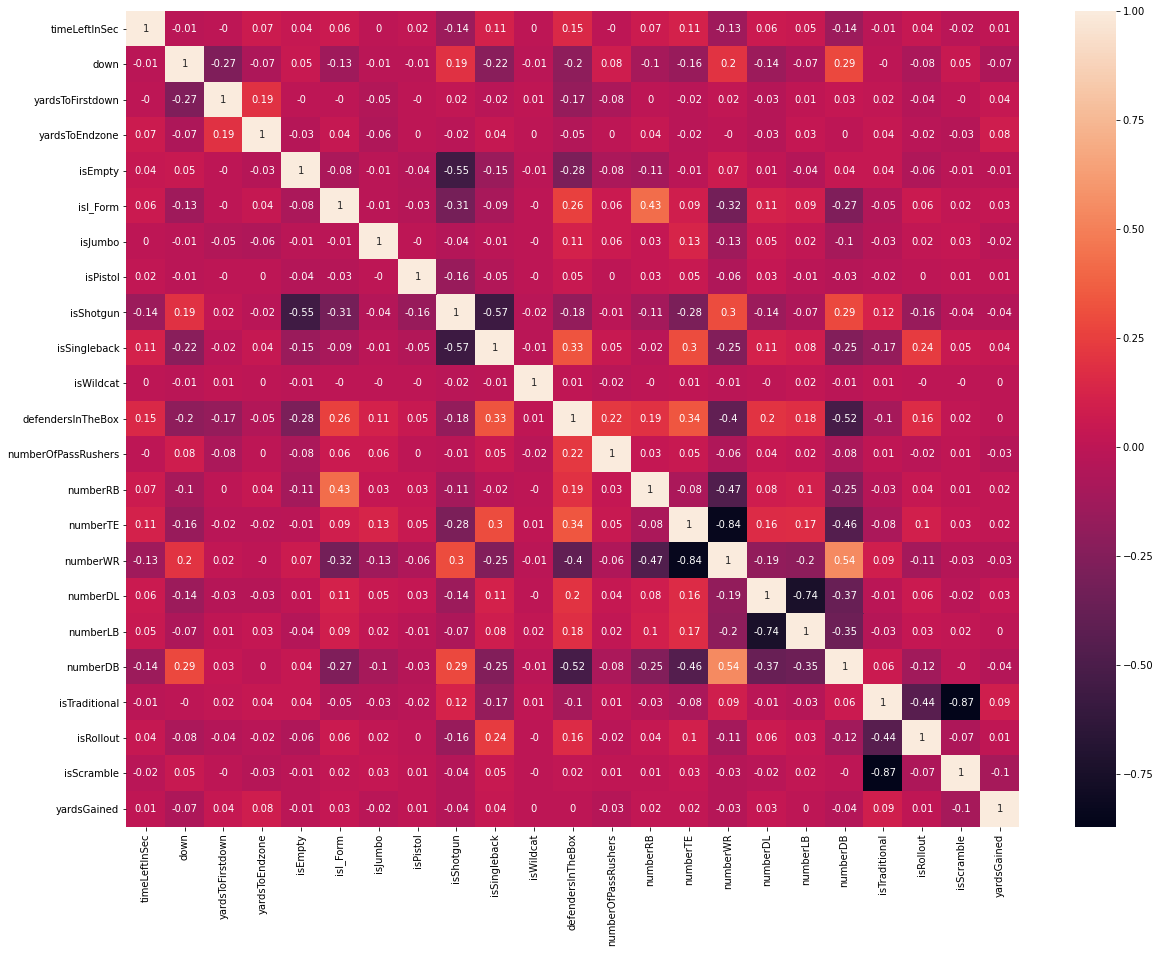

In [50]:
correlation_matrix2 = df_noYardOutliers.corr().round(2)
plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix2, annot=True)


#Even after removing outliers from our yardsGained column, our correlation matrix has not improved. Our correlation is still very close to 0, which is not a good sign. This tells us that the data we have to predict 
#yardsGained is not very good. We will try a few more strategies for cleaning the data to see if we can find a way to improve correlation. 


(16844, 23)


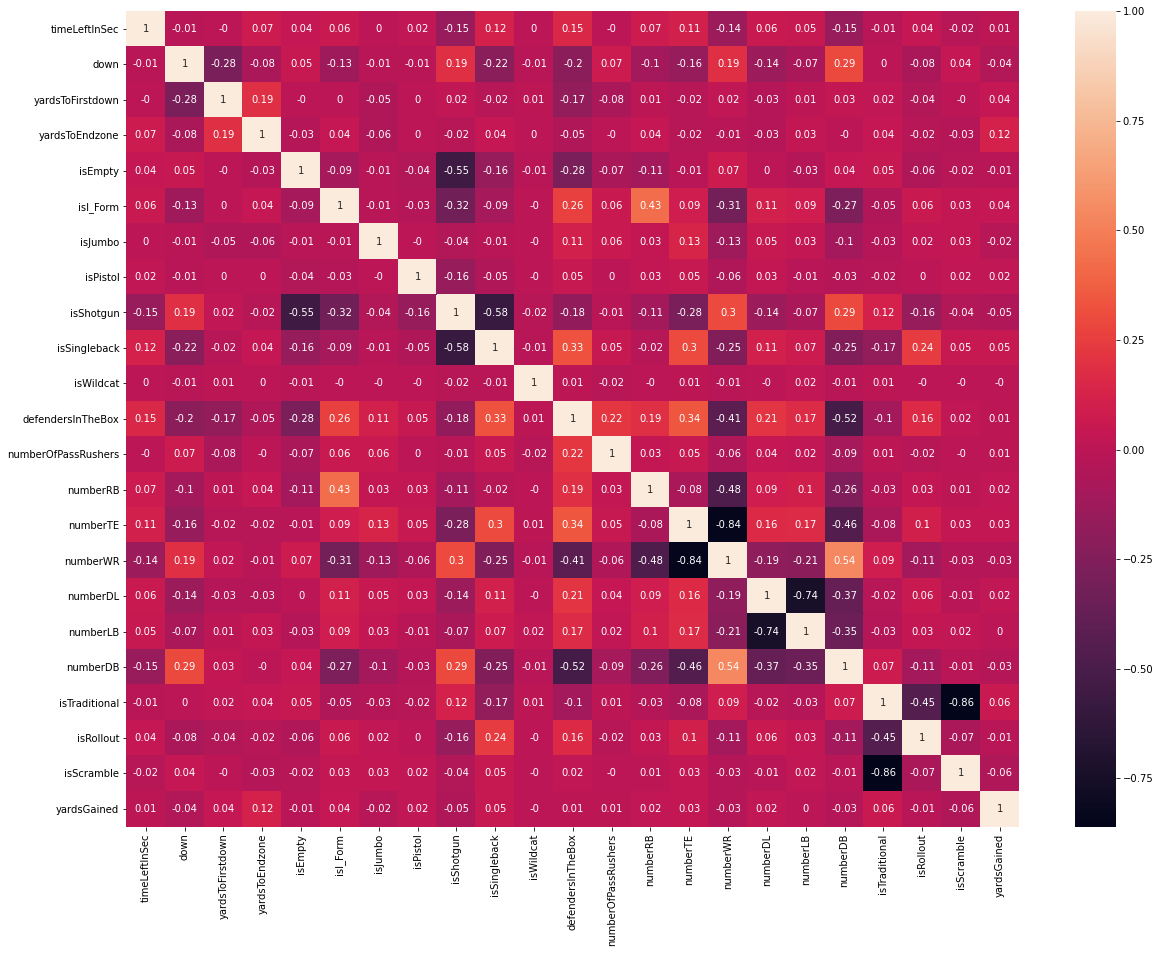

In [51]:
df_yards15 = df[(df["yardsGained"] <= 10)]
df_yards15 = df[(df["yardsGained"] >= -5)]

print(df_yards15.shape)
correlation_matrix2 = df_yards15.corr().round(2)
plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix2, annot=True)


# After creating a heat map with an adjusted range for yardsGained, we can see that some of our correlations improved slightly, however not enough to provide us with an accurate regression model. We adjusted yardsGained this 
# time to include any passing play that went from -5 yards to +10 yards, which would be a first down and result in a new set of 4 downs for the offensive team. 


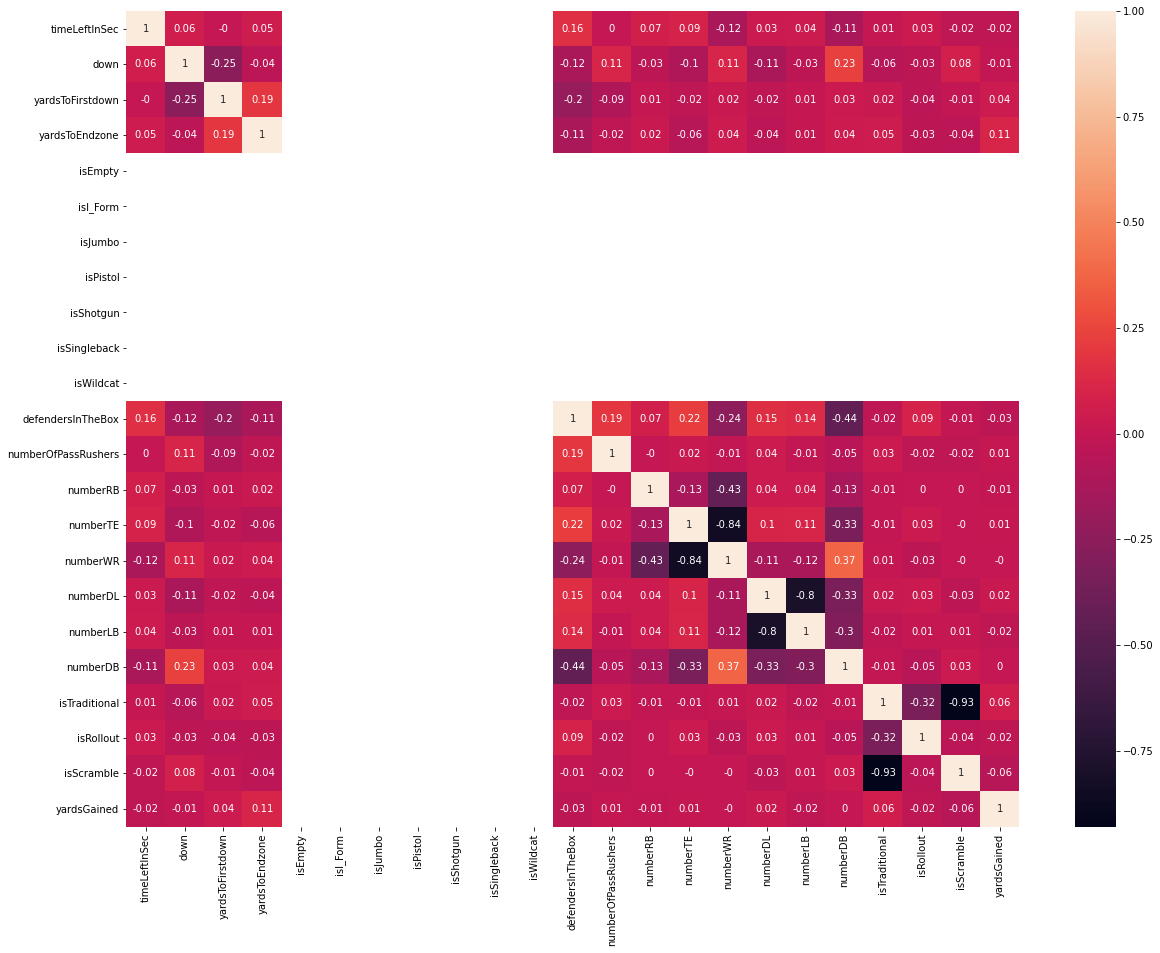

In [52]:
df_1 = df_yards15[(df_yards15["isShotgun"] == 1)]

correlation_matrix2 = df_1.corr().round(2)
plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix2, annot=True)


# Next we tried removing all plays that were not "shotgun" plays, and we can see that the correlation matrix no longer has any data for many of the columns. By only keeping shotgun plays, we are excluding all other types of 
# passing plays that were present in our data set, which is why we have so much blank space in the correlation matrix. 


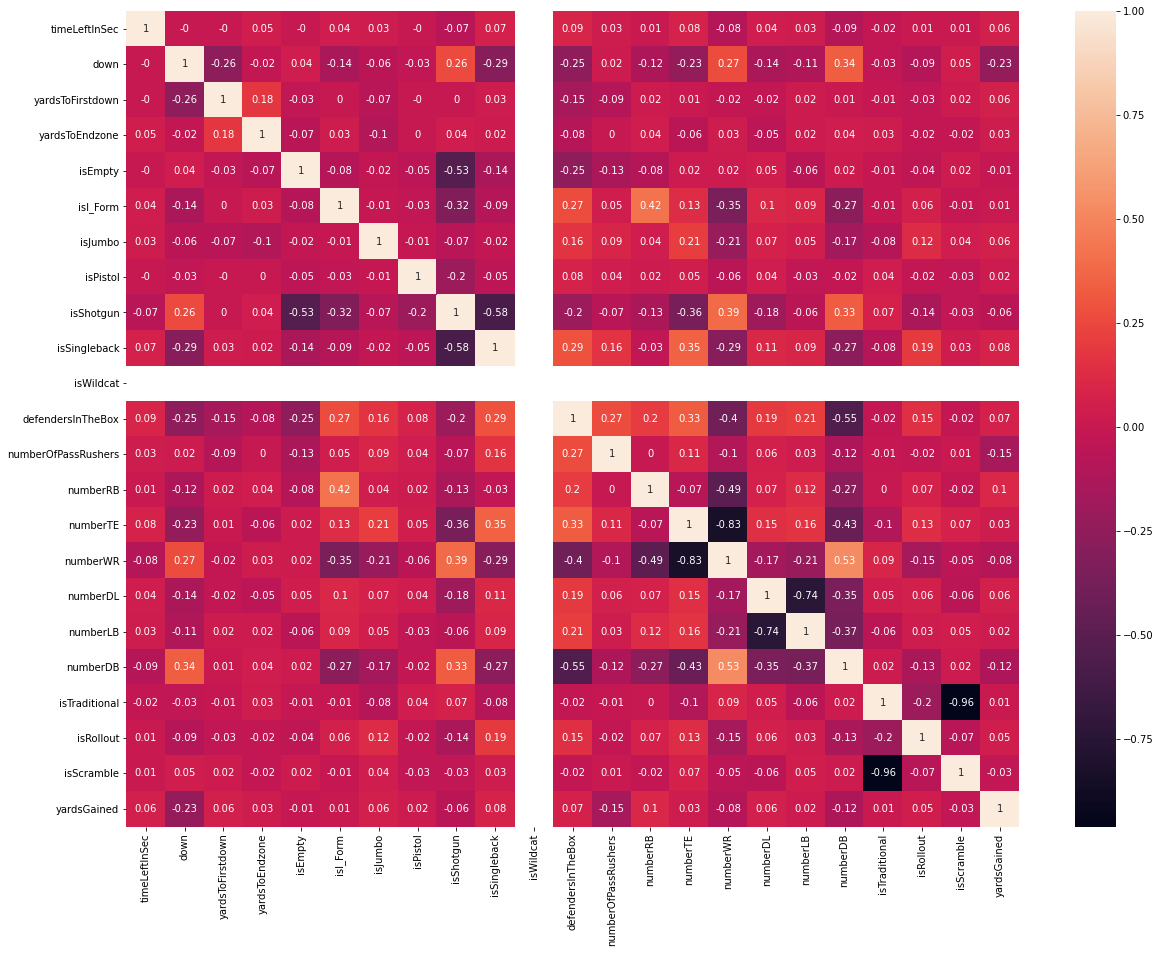

In [53]:
df_2 = df[(df["yardsGained"] < 0)]

correlation_matrix2 = df_2.corr().round(2)
plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix2, annot=True)


# We are still trying to improve correlation in our data set by cleaning out outliers and narrowing down our data to sommething more predictable. We are now only keeping data where yardsGained was less than 0. We are hoping
# that this can help us predict if a certain set of conditions will lead to a loss of yards for the offense. 


In [54]:
#Creates Predictors variable using remaining columns from the data frame
Class = df_2[["yardsGained"]]
Predictors = df_2[["down","numberOfPassRushers","numberDB","defendersInTheBox"]]
X_train, X_test, Y_train, Y_test = train_test_split(Predictors, Class, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
#Evaluates the performance of the model for the training set
y_train_predict = lin_model.predict(X_train)
#Calculates the RMSE for the training data
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
#Calculates the R^2 for the training data
r2 = r2_score(Y_train, y_train_predict)

print("Training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#Evaluates the performance of the model for the test set
y_test_predict = lin_model.predict(X_test)
#Calculates the RMSE for the test data
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
#Calculates the R^2 for the test data
r2 = r2_score(Y_test, y_test_predict)

print("Test set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Training set: (1136, 4) (1136, 1)
Test set: (284, 4) (284, 1)
Training set:
RMSE is 3.1660302820678883
R2 score is 0.07624453895980621


Test set:
RMSE is 3.16928037915014
R2 score is 0.0773893189417757


In [21]:
#We wanted to try a couple of regressions with other variables to attempt to find a more compelling relationship within the data. We attempted
#to predict the number of defensive backs here, using numberWR, numberTE, and down as the predictors. 

#Creates Predictors variable using remaining columns from the data frame
Class = df[["numberDB"]]
Predictors = df[["numberWR","numberTE","down"]]
X_train, X_test, Y_train, Y_test = train_test_split(Predictors, Class, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
#Evaluates the performance of the model for the training set
y_train_predict = lin_model.predict(X_train)
#Calculates the RMSE for the training data
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
#Calculates the R^2 for the training data
r2 = r2_score(Y_train, y_train_predict)

print("Training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#Evaluates the performance of the model for the test set
y_test_predict = lin_model.predict(X_test)
#Calculates the RMSE for the test data
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
#Calculates the R^2 for the test data
r2 = r2_score(Y_test, y_test_predict)

print("Test set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Coeffients: (numberWR, numberTE, down): " + str(lin_model.coef_))


#While this was more encouraging than our yardsGained Regressions, the R2 value of .33 is not great. We would like to see evidence
#of a stronger relationship before concluding that this model would be useful in actually predicting the number of defensive backs

Training set: (14128, 3) (14128, 1)
Test set: (3533, 3) (3533, 1)
Training set:
RMSE is 0.5309828542629706
R2 score is 0.3300346105772253


Test set:
RMSE is 0.5294920944046633
R2 score is 0.3231624506195222
Coeffients: (numberWR, numberTE, down): [[0.58278019 0.00482097 0.15070778]]


In [20]:
#We attempted to predict the number of wide receivers here, using numberRB and numberTE. 

#Creates Predictors variable using remaining columns from the data frame
Class = df[["numberWR"]]
Predictors = df[["numberTE","numberRB"]]
X_train, X_test, Y_train, Y_test = train_test_split(Predictors, Class, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
#Evaluates the performance of the model for the training set
y_train_predict = lin_model.predict(X_train)
#Calculates the RMSE for the training data
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
#Calculates the R^2 for the training data
r2 = r2_score(Y_train, y_train_predict)

print("Training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#Evaluates the performance of the model for the test set
y_test_predict = lin_model.predict(X_test)
#Calculates the RMSE for the test data
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
#Calculates the R^2 for the test data
r2 = r2_score(Y_test, y_test_predict)
print("Test set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Coeffients: (numberTE, numberRB): " + str(lin_model.coef_))


#This regression was perfect, with R^2 values of 1.00. This suggests that teams are required to have a certain number of wide receivers, running backs, and tight ends
#on the field for every play. Therefore, by knowing the numbers of two of those positions, it is easy to predict the other position. The coefficients show that as both 
#TE and RBs increase by 1, WRs decrease by one. This model probably isn't too useful, but we were encouraged that there was at least one good relationship in the data.

Training set: (14128, 2) (14128, 1)
Test set: (3533, 2) (3533, 1)
Training set:
RMSE is 7.99175449270159e-15
R2 score is 1.0


Test set:
RMSE is 7.790521058191084e-15
R2 score is 1.0
Coeffients: (numberTE, numberRB): [[-1. -1.]]


In [55]:
#Frusterated by the data's lackluster regression capabilities, we updated the dataset to include classifiers to tell whether the play was 
#positive, negative or zero yards gained. We wanted to try a classifier method as a last ditch attempt to create some sort of useful model.
body = client_0e13c2cd05114f26ab7cc32b4518509d.get_object(Bucket='ds320-donotdelete-pr-egg8nb6d95qqxy',Key='playsClassification.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dfClass = pd.read_csv(body)
dfClass = dfClass.drop(columns=["defendersInTheBox.1","numberOfPassRushers.1","yardsGained"])
dfClass.head()

,timeLeftInSec,down,yardsToFirstdown,yardsToEndzone,isEmpty,isI_Form,isJumbo,isPistol,isShotgun,isSingleback,isWildcat,defendersInTheBox,...,numberRB,numberTE,numberWR,numberDL,numberLB,numberDB,isTraditional,isRollout,isScramble,negative,incompete,positive
0,3600,1,15,80,0,1,0,0,0,0,0,7,...,2,1,2,4,2,5,1,0,0,0,0,1
1,3490,1,10,39,0,0,0,0,0,1,0,7,...,1,1,3,4,2,5,1,0,0,0,1,0
2,3485,2,10,39,0,0,0,0,1,0,0,6,...,2,1,2,4,2,5,1,0,0,0,1,0
3,3481,3,10,39,0,0,0,0,1,0,0,6,...,1,1,3,4,1,6,0,0,1,0,0,1
4,3359,3,1,1,0,0,0,0,1,0,0,8,...,2,3,0,6,3,2,1,0,0,0,1,0


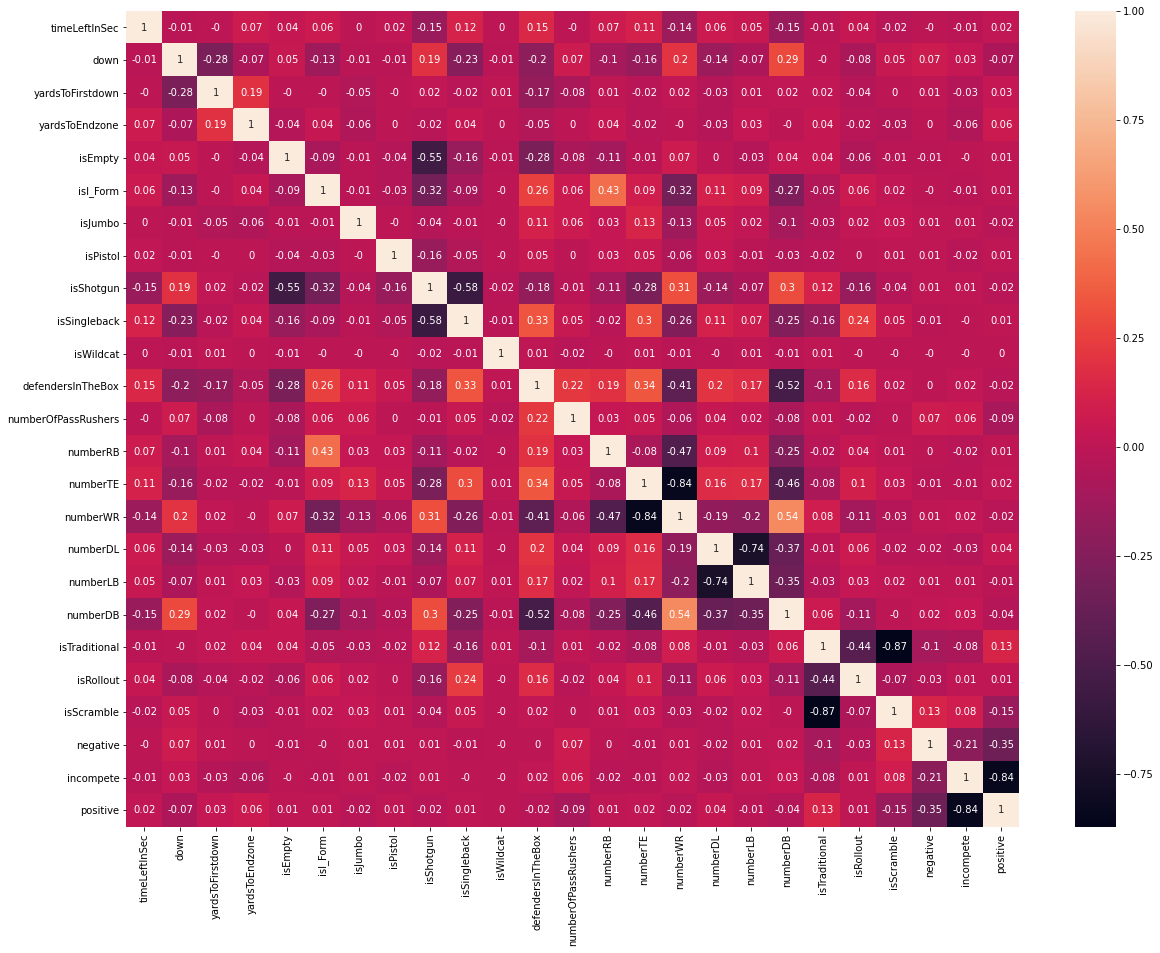

In [56]:
correlation_matrix2 = dfClass.corr().round(2)
plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix2, annot=True)
#Even with these classifiers in place, it doesn't look like there are any very encouraging factors for postive, negative, or zero yards gained plays. 

In [71]:
#Down, numberOfPassRushers, and isScramble seemed like the values with the best correlation with the negative, incomplete, and positive 
#yards gained classifiers. We tried to run tree-based and KNN classifiers for all three of the classifier variables. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

oneTrainingDF = dfClass[["down","numberOfPassRushers","isScramble"]]
oneClass = dfClass[["negative"]]
#Applies random data sampling to Predictors/Class with (80:20) ratio
#only uses the Training data
#Runs both tree-based and KNN classifier models. 
#Also prints confusion matrix for the KNN model test

X_train, X_test, Y_train, Y_test = train_test_split(oneTrainingDF, oneClass, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y_predict=clf.predict(X_test)
print("Training set Accuracy: ", metrics.accuracy_score(Y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predict))
labels=[0,1]
cm=confusion_matrix(Y_test,y_predict,labels)
print(cm)

k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
yhat = neigh.predict(X_test)
yhat[0:5]
print("Training set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))
labels=[0,1]
cm=confusion_matrix(Y_test,yhat,labels)
print(cm)

Training set: (14128, 3) (14128, 1)
Test set: (3533, 3) (3533, 1)
Training set Accuracy:  0.9188844847112118
Test set Accuracy:  0.9224455137277101
[[3259    0]
 [ 274    0]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training set Accuracy:  0.9047989807474519
Test set Accuracy:  0.9082932352108689
[[3195   64]
 [ 260   14]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [68]:
oneTrainingDF = dfClass[["down","numberOfPassRushers","isScramble"]]
oneClass = dfClass[["incompete"]]
#Applies random data sampling to Predictors/Class with (80:20) ratio
#only uses the Training data
#Runs both tree-based and KNN classifier models. 
#Also prints confusion matrix for the KNN model test

X_train, X_test, Y_train, Y_test = train_test_split(oneTrainingDF, oneClass, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y_predict=clf.predict(X_test)
print("Training set Accuracy: ", metrics.accuracy_score(Y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predict))
labels=[0,1]
cm=confusion_matrix(Y_test,y_predict,labels)
print(cm)

k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
yhat = neigh.predict(X_test)
yhat[0:5]
print("Training set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))
labels=[0,1]
cm=confusion_matrix(Y_test,yhat,labels)
print(cm)

Training set: (14128, 3) (14128, 1)
Test set: (3533, 3) (3533, 1)
Training set Accuracy:  0.6623725934314836
Test set Accuracy:  0.6575148598924427
[[2314   10]
 [1200    9]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training set Accuracy:  0.6547281993204983
Test set Accuracy:  0.6456269459382961
[[2210  114]
 [1138   71]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [69]:
oneTrainingDF = dfClass[["down","numberOfPassRushers","isScramble"]]
oneClass = dfClass[["positive"]]

X_train, X_test, Y_train, Y_test = train_test_split(oneTrainingDF, oneClass, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y_predict=clf.predict(X_test)
print("Training set Accuracy: ", metrics.accuracy_score(Y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predict))
labels=[0,1]
cm=confusion_matrix(Y_test,y_predict,labels)
print(cm)

k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
yhat = neigh.predict(X_test)
yhat[0:5]
print("Training set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))
labels=[0,1]
cm=confusion_matrix(Y_test,yhat,labels)
print(cm)

Training set: (14128, 3) (14128, 1)
Test set: (3533, 3) (3533, 1)
Training set Accuracy:  0.6132502831257078
Test set Accuracy:  0.6074157939428247
[[ 313 1170]
 [ 217 1833]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training set Accuracy:  0.5155011325028312
Test set Accuracy:  0.5106142088876309
[[ 833  650]
 [1079  971]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [ ]:
#Conclusion: These classifications felt better than the regressions, but even they weren't that encouraging. The 90% accuracy in the negative plays data looks great, but the confusion
#matrix shows that the model was just predicting everything to be positive and the low number of negative plays made the accuracy look better than it actually was. The incomplete
#and positive yard play models appeared to predict fairly randomly. Overall, this further reinforces our belief that NFL passing plays are simply not very predictable. We think
#that if they were, coaches from both teams would use this to their advantage, which could cause them to no longer be predictable and the advantage would be lost. While this is not
#the result we were hoping to get, it logically makes sense.